# 🧠 K-Nearest Neighbors (KNN) Classifier – Social Network Ads

This notebook demonstrates the use of the **K-Nearest Neighbors (KNN)** classification algorithm on a dataset derived from social network advertisements. The goal is to predict whether a user purchases a product based on two features: **Age** and **Estimated Salary**.

---

## 🔍 Problem Statement

A social network wants to target ads based on user profiles. You are given a dataset containing demographic information and a binary purchase variable. Using this data, we will build a model to predict whether a user will purchase the advertised product.

---

## 📌 Project Workflow

The notebook is organized into the following sections:

1. **Importing Required Libraries**  
2. **Loading and Exploring the Dataset**  
3. **Data Preprocessing**  
   - Feature selection  
   - Train-test split  
   - Feature scaling  
4. **Model Building**  
   - KNN classifier using Scikit-learn  
5. **Model Evaluation**  
   - Accuracy Score  
   - Confusion Matrix  
   - Classification Report  
6. **Visualization**  
   - Decision boundary plots for train and test sets  
7. **Conclusion & Observations**

---

📈 The project includes visualizations to understand model behavior and how KNN separates the classes in feature space.



1.Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2. **Loading and Exploring the Dataset**  

In [ ]:
df=pd.read_csv("/content/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


3. **Data Preprocessing**  
   - Feature selection  
   - Train-test split  
   - Feature scaling  

In [ ]:
#Input Data
x=df.iloc[:,:-1]
x

,User ID,Gender,Age,EstimatedSalary
0,15624510,Male,19,19000
1,15810944,Male,35,20000
2,15668575,Female,26,43000
3,15603246,Female,27,57000
4,15804002,Male,19,76000
...,...,...,...,...
395,15691863,Female,46,41000
396,15706071,Male,51,23000
397,15654296,Female,50,20000
398,15755018,Male,36,33000


In [ ]:
#Output Data
y=df.iloc[:,-1:]
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [ ]:
#Encoding-Converting Categorical Data into Numerical Data ['Male' → 1 ,'Female' → 0]
encoder=LabelEncoder()
df["Gender"]=encoder.fit_transform(df["Gender"])

#Scaling Values
scaler=StandardScaler()
x=df.iloc[:,0:3].values
x=scaler.fit_transform(x)
y=df.iloc[:,-1].values

In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train

array([[-1.23369247, -0.98019606, -1.01769239],
       [ 0.18224788,  1.02020406,  0.79705706],
       [ 0.6149231 , -0.98019606,  0.12846516],
       [ 1.65624435, -0.98019606,  0.60603081],
       [ 0.01787433, -0.98019606,  1.84770149],
       [-1.5070662 ,  1.02020406, -0.54012675],
       [ 0.54700234,  1.02020406,  0.31949142],
       [-0.18637699,  1.02020406,  0.98808332],
       [ 0.41083945,  1.02020406, -1.11320552],
       [-0.0941579 ,  1.02020406, -1.49525804],
       [-1.08081837,  1.02020406,  1.08359645],
       [-1.25738999, -0.98019606, -0.15807423],
       [-0.68206859,  1.02020406,  0.22397829],
       [ 1.36780817, -0.98019606,  0.31949142],
       [-0.08332914,  1.02020406, -1.11320552],
       [ 0.77627857, -0.98019606,  0.12846516],
       [ 0.24104454,  1.02020406,  2.03872775],
       [-0.10873131,  1.02020406,  0.41500455],
       [ 1.12525798, -0.98019606,  1.46564897],
       [-0.55271035,  1.02020406, -0.34910049],
       [ 1.17439958, -0.98019606,  1.847

In [ ]:
y_train

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,

In [ ]:
#Scaling Values
from sklearn.preprocessing import StandardScaler, LabelEncoder

#Encoding-Converting Categorical Data into Numerical Data ['Male' → 1 ,'Female' → 0]
encoder=LabelEncoder()
df["Gender"]=encoder.fit_transform(df["Gender"])

#Scaling Values
scaler=StandardScaler()
x=df.iloc[:,0:3].values
x=scaler.fit_transform(x)
y=df.iloc[:,-1].values

4. **Model Building**  
   - KNN classifier using Scikit-learn  

In [ ]:
#Training Model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [ ]:
#Examples testing
new_entry=np.array([[1,35,80000]])
new_entry_scaled=scaler.transform(new_entry)
new_entry_scaled=new_entry_scaled[:, 1:3]
prediction=knn.predict(new_entry_scaled)
print("Prediction:", "Purchased" if prediction[0] == 1 else "Not Purchased")

Prediction: Purchased


5. **Model Evaluation**  
   - Accuracy Score  
   - Confusion Matrix  
   - Classification Report  

In [ ]:
#Model Evaluation - Accuray Score
from sklearn.metrics import accuracy_score
print(f"Acuuracy Score of KNN model: {accuracy_score(y_test,y_pred)}")

Acuuracy Score of KNN model: 0.875


6. **Visualization**  

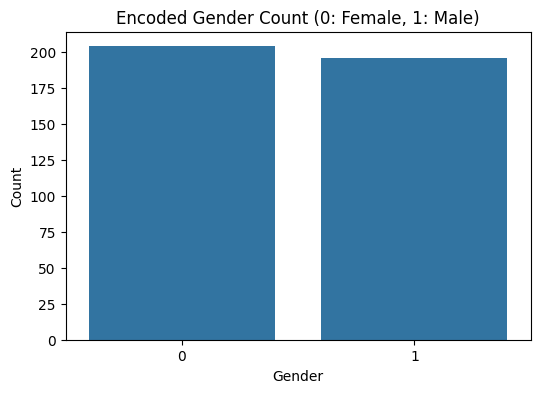

In [ ]:
# 1. Compare original and encoded Gender
plt.figure(figsize=(6,4))
sns.countplot(x=df["Gender"])
plt.title("Encoded Gender Count (0: Female, 1: Male)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


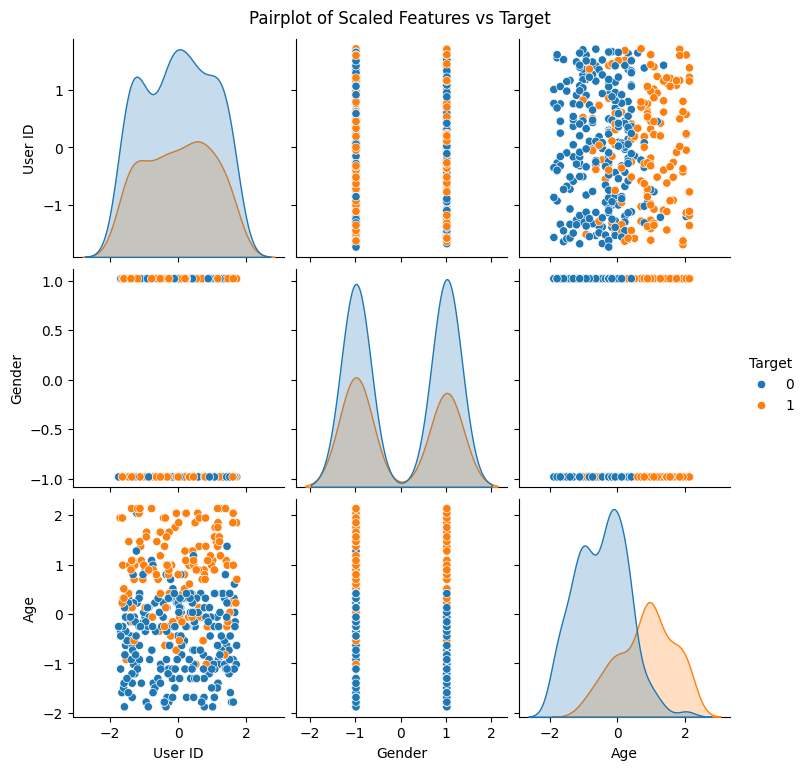

In [ ]:
# 2. Pairplot of scaled features colored by target
scaled_df = pd.DataFrame(x, columns=df.columns[0:3])
scaled_df["Target"] = y

sns.pairplot(scaled_df, hue="Target", diag_kind="kde")
plt.suptitle("Pairplot of Scaled Features vs Target", y=1.02)
plt.show()

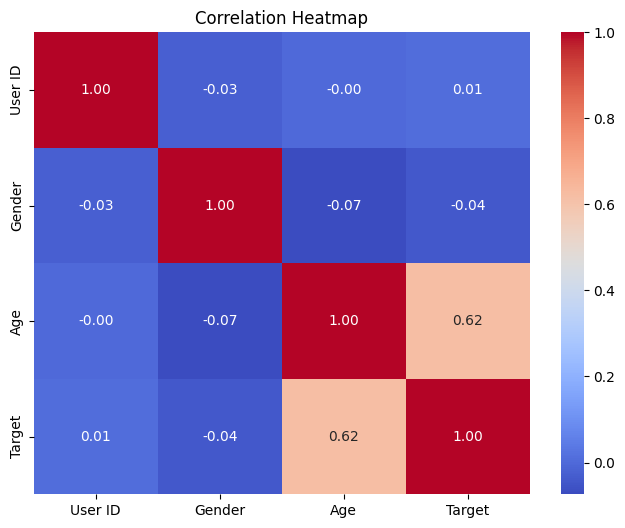

In [ ]:
# 3. Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(scaled_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

---

## 📝 Summary

In this notebook, we:

- Explored a binary classification problem using real-world social network ad data.
- Preprocessed the data, selected relevant features, and scaled them appropriately.
- Implemented a **K-Nearest Neighbors (KNN)** classifier using Scikit-Learn.
- Evaluated the model using accuracy score, confusion matrix, and classification report.
- Visualized the **decision boundaries** to understand how KNN performs in the feature space.

---

## 🔧 Next Steps / Improvements

- **Hyperparameter Tuning**: Use techniques like GridSearchCV to find the optimal `K` value.
- **Cross-Validation**: Improve robustness by evaluating model performance across multiple folds.
- **Feature Engineering**: Consider adding or transforming features for better predictive power.
- **Compare with Other Models**: Try logistic regression, SVM, or decision trees for benchmarking.

---

📌 The KNN algorithm is simple and effective, but sensitive to feature scaling and the choice of `K`. Visualizations help understand its limitations and how well it captures class boundaries.
